# 1. Clustering using K-means and EM

In [46]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [47]:
import sklearn 

print (sklearn.__version__)

0.22.2.post1


In [48]:
import numpy as np
import pandas as pd
from time import time
import matplotlib
import matplotlib.pyplot as plt
import warnings
import csv
import time
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)


#data1 = pd.read_csv("winequality-data.csv") 
data1 = pd.read_csv("breast_cancer.csv") 
 


data2 = pd.read_csv("tmdb-movies-reproduced.csv")

labels = data1["diagnosis"]
labels2 = data2["profit"]
list = ['Unnamed: 32','id','diagnosis']

features = data1.drop(list,axis = 1 )

from sklearn.preprocessing import StandardScaler as ss
scale = ss()

features = scale.fit_transform(features)


features2 = data2.drop("profit",axis = 1)
features2 = scale.fit_transform(features2)

In [49]:

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.3, random_state=42)


## 1.1 Dataset 1

In [58]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 


In [11]:
#dataset1

km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}

n_candidates = [i*1+1 for i in range(20)]

clustering_results1 = [["","KM score","KM mutual info","KM rand","KM homogeneity","KM completeness","KM v-measure","KM time",
                       "EM score","EM mutual info","EM rand","EM homogeneity","EM completeness","EM v-measure","EM time"]]

round_start = time.time()
for n in n_candidates:
    
    
    km_dic["n_clusters"] = n
    EM_dic["n_components"] = n
    
    row = [n]
    
    model = KMeans(**km_dic)
    start_time = time.time()
    model.fit(features)
    preds = model.predict(features)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels,preds)   
    row += [-model.score(features),adjusted_mutual_info_score(labels,preds),adjusted_rand_score(labels,preds),
            homogeneity,completeness,v_measure,end_time - start_time]    


    model = BayesianGaussianMixture(**EM_dic)
    start_time = time.time()
    model.fit(features)
    preds = model.predict(features)
    end_time = time.time()
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(labels,preds)   
    row += [model.score(features),adjusted_mutual_info_score(labels,preds),adjusted_rand_score(labels,preds),
            homogeneity,completeness,v_measure,end_time - start_time]    

    print (n)
    clustering_results1.append(row)
round_end = time.time()

print ("Total Time:",round_end - round_start)

# output    
with open("1.dataset1_KMeans_clustering.csv",'w') as resultFile:
    wr = csv.writer(resultFile, dialect='excel')
    wr.writerows(clustering_results1)     

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Total Time: 8.782415866851807


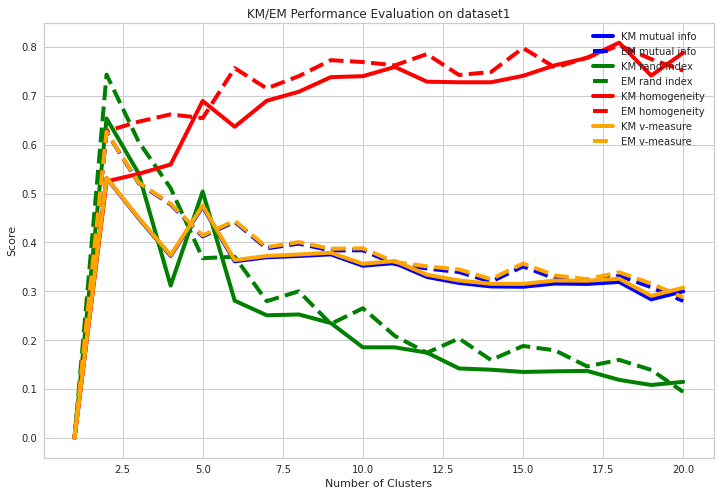

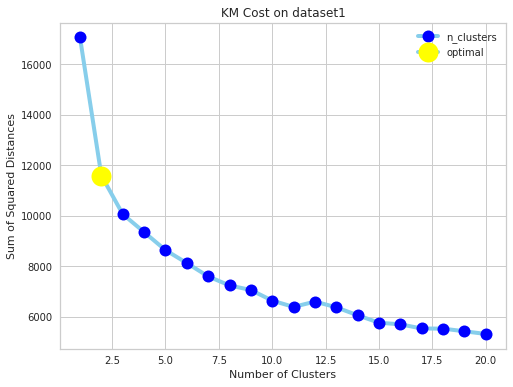

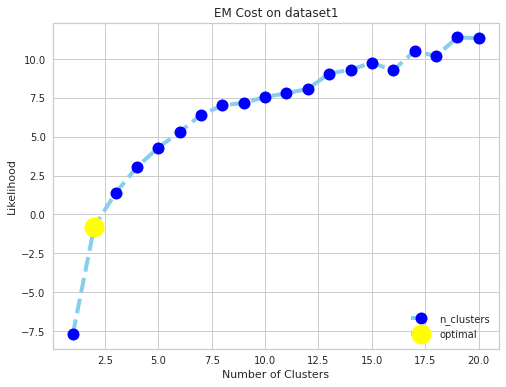

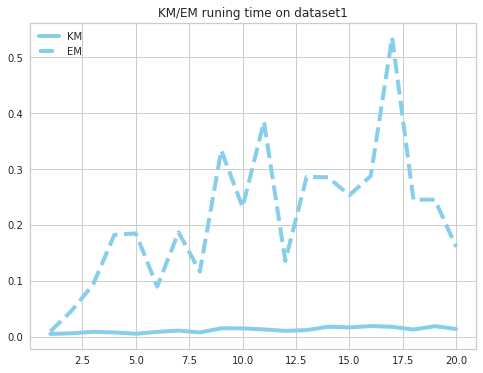

In [13]:
clustering_df1 = pd.read_csv("1.dataset1_KMeans_clustering.csv")
x = clustering_df1.iloc[:,0]
 
# score    
plt.figure(figsize = (12,8))    
plt.plot( x, clustering_df1["KM mutual info"], color='blue', linewidth=4,label = "KM mutual info")
plt.plot( x, clustering_df1["EM mutual info"],linestyle='dashed',color='blue', linewidth=4,label = "EM mutual info")

plt.plot( x, clustering_df1["KM rand"],color='green', linewidth=4,label = "KM rand index")
plt.plot( x, clustering_df1["EM rand"],linestyle='dashed',color='green', linewidth=4,label = "EM rand index")

plt.plot( x, clustering_df1["KM homogeneity"],color='red', linewidth=4,label = "KM homogeneity")
plt.plot( x, clustering_df1["EM homogeneity"],linestyle='dashed',color='red', linewidth=4,label = "EM homogeneity")

plt.plot( x, clustering_df1["KM v-measure"],color='orange', linewidth=4,label = "KM v-measure");
plt.plot( x, clustering_df1["EM v-measure"],linestyle='dashed',color='orange', linewidth=4,label = "EM v-measure");
plt.legend(loc='upper right')
plt.title("KM/EM Performance Evaluation on dataset1")
plt.xlabel("Number of Clusters")
plt.ylabel("Score");

# KM cost/EM cost
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df1["KM score"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 2,clustering_df1["KM score"][1], marker='o', markerfacecolor='yellow', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("KM Cost on dataset1")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances");
plt.legend(loc='upper right')


plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df1["EM score"], marker='o', markerfacecolor='blue', linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "n_clusters")
plt.plot( 2,clustering_df1["EM score"][1], marker='o', markerfacecolor='yellow',linestyle='dashed', markersize=20, color='skyblue', linewidth=4,label = "optimal")
plt.title("EM Cost on dataset1")
plt.xlabel("Number of Clusters")
plt.ylabel("Likelihood");
plt.legend(loc='lower right')


# KM speed/EM speed
plt.figure(figsize = (8,6)) 
plt.plot( x,clustering_df1["KM time"],  markersize=12, color='skyblue', linewidth=4,label = "KM")
plt.plot( x,clustering_df1["EM time"], linestyle='dashed',markersize=12, color='skyblue', linewidth=4,label = "EM");
plt.title("KM/EM runing time on dataset1")
plt.legend(loc='upper left')

# 2. Dimensionality Reduction using PCA, ICA, RP, and SVD

In [86]:
from sklearn.decomposition import PCA,FastICA,TruncatedSVD

from sklearn.random_projection import GaussianRandomProjection

from sklearn.metrics.pairwise import cosine_similarity

from tabulate import tabulate

## 2.1 Choose n_components for PCA

In [87]:

from kneed import KneeLocator
import numpy.matlib
def find_knee(values):
    # get coordinates of all the points
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T
    # np.array([range(nPoints), values])

    # get the first point
    firstPoint = allCoord[0]
    # get vector between first and last point - this is the line
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec ** 2))

    # find the distance from each point to the line:
    # vector between all points and first point
    vecFromFirst = allCoord - firstPoint

    # To calculate the distance to the line, we split vecFromFirst into two
    # components, one that is parallel to the line and one that is perpendicular
    # Then, we take the norm of the part that is perpendicular to the line and
    # get the distance.
    # We find the vector parallel to the line by projecting vecFromFirst onto
    # the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel
    # We project vecFromFirst by taking the scalar product of the vector with
    # the unit vector that points in the direction of the line (this gives us
    # the length of the projection of vecFromFirst onto the line). If we
    # multiply the scalar product by the unit vector, we have vecFromFirstParallel
    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel

    # distance to line is the norm of vecToLine
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

    # knee/elbow is the point with max distance value
    idxOfBestPoint = np.argmax(distToLine)
    return idxOfBestPoint


7


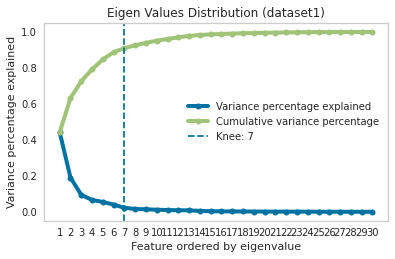

In [14]:
pca = PCA()
temp = pca.fit_transform(features)

pca_ratio = np.array(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_))
pca_cum_ratio=np.cumsum(pca.explained_variance_ratio_)

tmp_df = pd.Series(data=pca_ratio, index=range(1, min(pca_ratio.shape[0], 500) + 1))
tmp_df_cum = pd.Series(data=pca_cum_ratio, index=range(1, min(pca_ratio.shape[0], 500) + 1))

title="Eigen Values Distribution (dataset1)"
xlabel='Feature ordered by eigenvalue'
ylabel='Variance percentage explained'
plt.close()
plt.figure()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()
plt.tight_layout()

ax = plt.gca()

x_points = tmp_df.index.values
y_points = tmp_df.values
x2_points = tmp_df_cum.index.values
y2_points = tmp_df_cum.values

plt.plot(x_points, y_points, 'o-', linewidth=4, markersize=6,label=ylabel)
plt.plot(x2_points, y2_points, 'o-', linewidth=4, markersize=6,label='Cumulative variance percentage')


min_value = np.min(y_points)
min_point = np.argmin(y_points)
max_value = np.max(y_points)
max_point = np.argmax(y_points)
knee_point = find_knee(y_points)
kl = KneeLocator(x_points, y_points,S=1.0,curve='convex',direction='decreasing')

#ax.axvline(x=min_point, linestyle="--", label="Min: {}".format(int(min_point)))
#ax.axvline(x=max_point, linestyle="--", label="Max: {}".format(int(max_point)))
if kl.knee is not None:
    ax.axvline(x=kl.knee, linestyle="--", label="Knee: {}".format(kl.knee))
else:
    ax.axvline(x=knee_point, linestyle="--", label="Knee: {}".format(knee_point))

ax.set_xticks(tmp_df.index.values, minor=False)
plt.legend(loc="best")



print (np.argmax(pca_cum_ratio>0.92))
#print ("Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in pca_res if i >= 0.00001]),features.shape[1]))
#print ("Variance captured: {} %".format(sum([i for i in pca_res if i >= 0.00001])*100.))

## Reconstruct dataset1 from PCA data

In [88]:
from tabulate import tabulate

n_candidates = [int(features.shape[1]*0.1*(i+1)) for i in range(10)]
reconstruct_pca_res = []
for i,n in enumerate(n_candidates):
    pca = PCA(n)
    temp = pca.fit_transform(features)
    diff = features - pca.inverse_transform(temp)
    reconstruct_pca_res.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_pca_res, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

╒════════════════╤══════════════╤═════════════╤═════════════╤══════════════╕
│ N components   │         mean │         std │         max │          min │
╞════════════════╪══════════════╪═════════════╪═════════════╪══════════════╡
│ 3 (10%)        │ -1.51932e-17 │ 0.523103    │ 7.20514     │ -3.74153     │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 6 (20%)        │  5.09909e-18 │ 0.335279    │ 4.68186     │ -3.4598      │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 9 (30%)        │  4.68284e-19 │ 0.245196    │ 3.22635     │ -2.69482     │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 12 (40%)       │ -7.33645e-18 │ 0.172999    │ 1.98325     │ -1.98429     │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤
│ 15 (50%)       │ -7.1836e-18  │ 0.116241    │ 1.90952     │ -1.24776     │
├────────────────┼──────────────┼─────────────┼─────────────┼──────────────┤

## 2.2 Choose n_components for ICA

In [95]:
# bag of features, sorted independence
# picking of features based on independence??
# Kurtosis is defined as the normalized form of the fourth central moment of a distribution: 
# sort by kurtosis!! then choose based on 

from scipy.stats import kurtosis,entropy

# dataset1:84
ica = FastICA(tol = 0.001)
temp = ica.fit_transform(features)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
ica_res =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);

Reduced Dimension: 2 out of 30


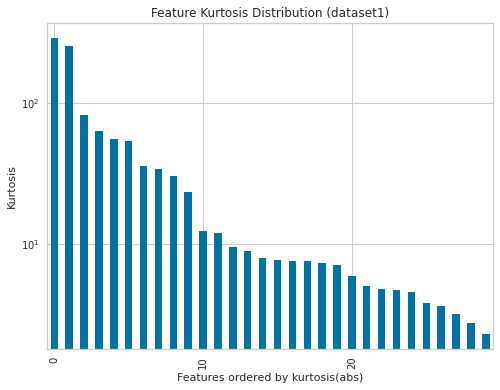

In [96]:
plt.figure(figsize=(8,6))
ax = ica_res.plot(kind = 'bar',logy = True);
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::10])
ax.xaxis.set_ticklabels(ticklabels[::10]);


plt.title("Feature Kurtosis Distribution (dataset1)")
plt.xlabel("Features ordered by kurtosis(abs)")
plt.ylabel("Kurtosis")


print ("Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in ica_res if i >= 3.]),features.shape[1]))

In [146]:
ica_res

0     289.183202
1     251.458732
2      82.248798
3      63.103329
4      55.154824
5      54.069506
6      35.531258
7      33.986000
8      30.323112
9      23.375550
10     12.435094
11     11.930457
12      9.452013
13      8.964470
14      8.003131
15      7.736734
16      7.586933
17      7.576934
18      7.312127
19      7.141822
20      5.966821
21      5.034443
22      4.817709
23      4.688488
24      4.545846
25      3.818330
26      3.619293
27      3.176050
28      2.767146
29      2.290375
dtype: float64

## Reconstruct dataset2 from ICA data

In [97]:
n_candidates = [int(features.shape[1]*0.1*(i+1)) for i in range(10)]
reconstruct_ica_res = []
for i,n in enumerate(n_candidates):
    ica = FastICA(n,tol = 0.001)
    temp = ica.fit_transform(features)
    diff = features - ica.inverse_transform(temp)
    reconstruct_ica_res.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_ica_res, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

╒════════════════╤══════════════╤════════════╤═════════════╤══════════════╕
│ N components   │         mean │        std │         max │          min │
╞════════════════╪══════════════╪════════════╪═════════════╪══════════════╡
│ 3 (10%)        │ -4.16252e-18 │ 0.523103   │ 7.20515     │ -3.74153     │
├────────────────┼──────────────┼────────────┼─────────────┼──────────────┤
│ 6 (20%)        │  4.68284e-19 │ 0.335279   │ 4.68186     │ -3.45981     │
├────────────────┼──────────────┼────────────┼─────────────┼──────────────┤
│ 9 (30%)        │ -2.9658e-18  │ 0.245196   │ 3.22636     │ -2.69481     │
├────────────────┼──────────────┼────────────┼─────────────┼──────────────┤
│ 12 (40%)       │ -1.319e-17   │ 0.172999   │ 1.98325     │ -1.98429     │
├────────────────┼──────────────┼────────────┼─────────────┼──────────────┤
│ 15 (50%)       │  1.77558e-18 │ 0.116241   │ 1.90952     │ -1.24775     │
├────────────────┼──────────────┼────────────┼─────────────┼──────────────┤
│ 18 (60%)  

## 2.3 Choose n_components for RP

In [41]:
# dataset1:PCA
repeats = []
for i in range(5):
    rp = PCA(n_components = 8)
    temp = rp.fit_transform(features)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print ("Mean pairwise differences:",np.mean(diffs))
print ("STD of the pairwise differences:",np.std(diffs))

Mean pairwise differences: 2.5160540573962816e-18
STD of the pairwise differences: 7.554974361241705e-06


In [42]:
# dataset1: RP
repeats = []
for i in range(5):
    rp = GaussianRandomProjection(n_components = 8)
    temp = rp.fit_transform(features)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print ("Mean pairwise differences:",np.mean(diffs))
print ("STD of the pairwise differences:",np.std(diffs))

Mean pairwise differences: -7.992044831045064e-17
STD of the pairwise differences: 2.703845604379007


In [43]:
# dataset2: PCA
repeats = []
for i in range(5):
    rp = PCA(n_components = 60)
    temp = rp.fit_transform(features2)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print ("Mean pairwise differences:",np.mean(diffs))
print ("STD of the pairwise differences:",np.std(diffs))

Mean pairwise differences: 1.4440049644310094e-17
STD of the pairwise differences: 0.7867449697053114


In [44]:
# dataset2: RP
repeats = []
for i in range(5):
    rp = GaussianRandomProjection(n_components = 60)
    temp = rp.fit_transform(features2)
    repeats.append(temp)

diffs = []
for (i,j) in [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)]:
    diffs.append(repeats[i]-repeats[j])
print ("Mean pairwise differences:",np.mean(diffs))
print ("STD of the pairwise differences:",np.std(diffs))

Mean pairwise differences: -2.382704330123711e-17
STD of the pairwise differences: 1.6309666809770915


In [45]:
comparision = [["PCA",1,5,10,3.25e-17,0.001],
               ["RP",1,5,10,-0.0136,0.698],
               ["PCA",2,5,10,-3.44e-18,0.035],
               ["RP",2,5,10,0.0004,0.690]]

print (tabulate(comparision,headers = ["","dataset","Nrepeats","Npairs","pairwise mean(diff)","pairwise std(diff)"]))


       dataset    Nrepeats    Npairs    pairwise mean(diff)    pairwise std(diff)
---  ---------  ----------  --------  ---------------------  --------------------
PCA          1           5        10               3.25e-17                 0.001
RP           1           5        10              -0.0136                   0.698
PCA          2           5        10              -3.44e-18                 0.035
RP           2           5        10               0.0004                   0.69


## 2.4 Choose n_components for SVD

61


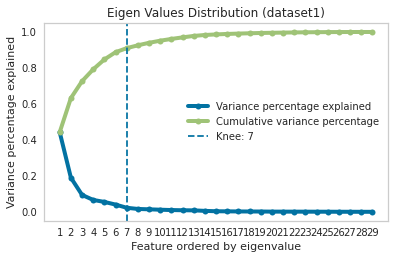

In [52]:

svd = TruncatedSVD(n_components = features.shape[1]-1)
temp = svd.fit_transform(features)



svd_ratio = np.array(svd.explained_variance_ratio_/sum(svd.explained_variance_ratio_))
svd_cum_ratio=np.cumsum(svd.explained_variance_ratio_)

tmp_df = pd.Series(data=svd_ratio, index=range(1, min(svd_ratio.shape[0], 500) + 1))
tmp_df_cum = pd.Series(data=svd_cum_ratio, index=range(1, min(svd_ratio.shape[0], 500) + 1))

title="Eigen Values Distribution (dataset1)"
xlabel='Feature ordered by eigenvalue'
ylabel='Variance percentage explained'
plt.close()
plt.figure()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()
plt.tight_layout()

ax = plt.gca()

x_points = tmp_df.index.values
y_points = tmp_df.values
x2_points = tmp_df_cum.index.values
y2_points = tmp_df_cum.values

plt.plot(x_points, y_points, 'o-', linewidth=4, markersize=6,label=ylabel)
plt.plot(x2_points, y2_points, 'o-', linewidth=4, markersize=6,label='Cumulative variance percentage')


min_value = np.min(y_points)
min_point = np.argmin(y_points)
max_value = np.max(y_points)
max_point = np.argmax(y_points)
knee_point = find_knee(y_points)
kl = KneeLocator(x_points, y_points,S=1.0,curve='convex',direction='decreasing')

#ax.axvline(x=min_point, linestyle="--", label="Min: {}".format(int(min_point)))
#ax.axvline(x=max_point, linestyle="--", label="Max: {}".format(int(max_point)))
if kl.knee is not None:
    ax.axvline(x=kl.knee, linestyle="--", label="Knee: {}".format(kl.knee))
else:
    ax.axvline(x=knee_point, linestyle="--", label="Knee: {}".format(knee_point))

ax.set_xticks(tmp_df.index.values, minor=False)
plt.legend(loc="best")



print (np.argmax(pca_cum_ratio>0.90))
#print ("Reduced Dimension: {} out of {}".format(features.shape[1]-len([i for i in pca_res if i >= 0.00001]),features.shape[1]))
#print ("Variance captured: {} %".format(sum([i for i in pca_res if i >= 0.00001])*100.))

## Reconstruct dataset1 from SVD data

In [98]:
n_candidates = [int(features.shape[1]*0.1*(i+1))-1 for i in range(10)]
reconstruct_svd_res = []
for i,n in enumerate(n_candidates):
    svd = TruncatedSVD(n)
    temp = svd.fit_transform(features)
    diff = features - svd.inverse_transform(temp)
    reconstruct_svd_res.append(["{} ({}%)".format(n,(i+1)*10),np.mean(diff),np.std(diff),np.max(diff),np.min(diff)])
    
print (tabulate(reconstruct_svd_res, headers=['N components', 'mean',"std","max",'min'],tablefmt='fancy_grid'))

╒════════════════╤══════════════╤═══════════╤═══════════╤════════════╕
│ N components   │         mean │       std │       max │        min │
╞════════════════╪══════════════╪═══════════╪═══════════╪════════════╡
│ 2 (10%)        │  4.16252e-19 │ 0.606274  │ 8.5037    │ -3.21292   │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 5 (20%)        │ -2.13329e-18 │ 0.390714  │ 5.92103   │ -3.4497    │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 8 (30%)        │ -1.02502e-17 │ 0.272062  │ 4.25287   │ -3.23076   │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 11 (40%)       │  3.56416e-18 │ 0.196555  │ 2.17453   │ -1.97658   │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 14 (50%)       │  8.32505e-19 │ 0.129034  │ 1.89963   │ -1.64195   │
├────────────────┼──────────────┼───────────┼───────────┼────────────┤
│ 17 (60%)       │  7.19986e-18 │ 0.0941797 │ 1.47085   │ -0.921839  │
├─────

# 3. Clustering on Dimension Reduced Data

## 3.0 Comparison

Training time: 0.08812212944030762 sec


Text(0.5, 1.0, 'PCA on Dataset1')

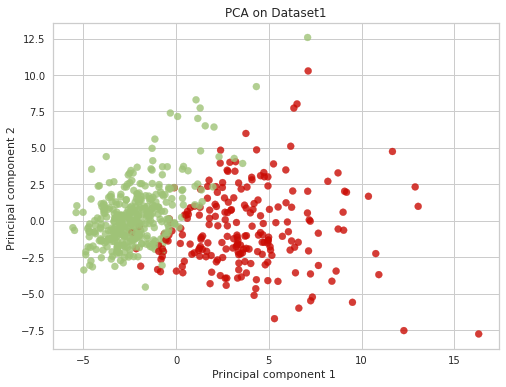

In [148]:
# pca
start_time = time.time()
temp = PCA(n_components = 7).fit_transform(features)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 'M' else 'g' for i in range(len(labels))],alpha = 0.8);
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")


for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(30)

plt.title("PCA on Dataset1")





Training time: 0.020083904266357422 sec


Text(0.5, 1.0, 'ICA on Dataset1')

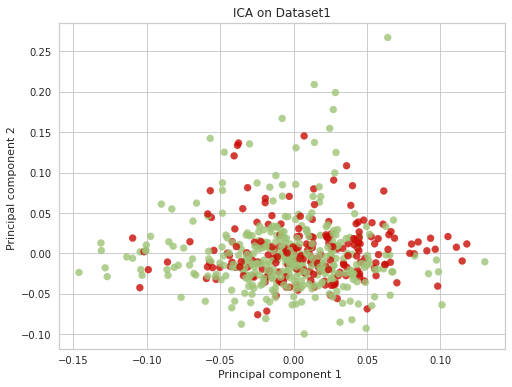

In [149]:
# ica
start_time = time.time()
temp = FastICA(n_components = 9).fit_transform(features)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 'M' else 'g' for i in range(len(labels))],alpha = 0.8);

plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
plt.title("ICA on Dataset1")



Training time: 0.0007312297821044922 sec


Text(0.5, 1.0, 'RP on Dataset1')

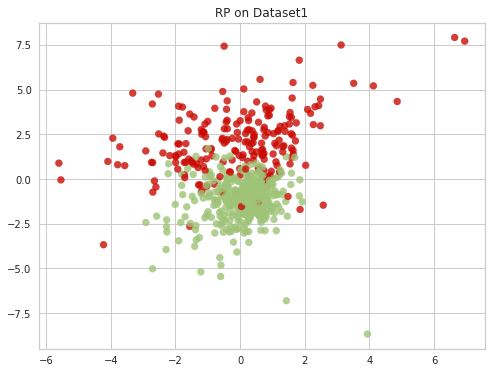

In [150]:
# rp
start_time = time.time()
temp = GaussianRandomProjection(n_components = 7).fit_transform(features)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 'M' else 'g' for i in range(len(labels))],alpha = 0.8);
plt.title("RP on Dataset1")



Training time: 0.007232666015625 sec


Text(0.5, 1.0, 'SVD on Dataset1')

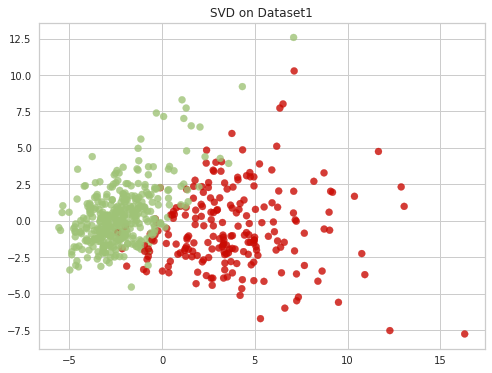

In [152]:
# svd
start_time = time.time()
temp = TruncatedSVD(n_components = 7).fit_transform(features)
end_time = time.time()

print ("Training time: {} sec".format(end_time - start_time))
plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if labels[i] == 'M' else 'g' for i in range(len(labels))],alpha = 0.8);
plt.title("SVD on Dataset1")





In [147]:
#siloutte score:
# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) 
# and the mean nearest-cluster distance (b) for each sampl
from sklearn.metrics import silhouette_score

names = ["PCA","ICA","RP ","SVD"]
twoD_data = [PCA(n_components = 7).fit_transform(features),
FastICA(n_components = 9).fit_transform(features),
GaussianRandomProjection(n_components = 7).fit_transform(features),
TruncatedSVD(n_components = 7).fit_transform(features)]

for name,data in zip(names,twoD_data): 
    print (name," silhouette score:",silhouette_score(data,labels))

PCA  silhouette score: 0.3184557513696121
ICA  silhouette score: 0.12311155733393818
RP   silhouette score: 0.2871248028945293
SVD  silhouette score: 0.3184557796088026


In [ ]:
# dataset1 PCA siloutte score
silhouette_score(PCA(n_components = 2).fit_transform(features),labels)

In [43]:
comparison_d1 = [["PCA",1,0.360,0.1125],
                 ["ICA",1,1.485,"NA"],
                 ["RP",1,0.067,"NA"],
                 ["SVD",1,0.230,"NA"]]

print (tabulate(comparison_d1,headers = ["","dataset","time(sec)","silhoutte score"]))

       dataset    time(sec)  silhoutte score
---  ---------  -----------  -----------------
PCA          1        0.36   0.1125
ICA          1        1.485  NA
RP           1        0.067  NA
SVD          1        0.23   NA


# 3.1 Visualization on dataset 1  

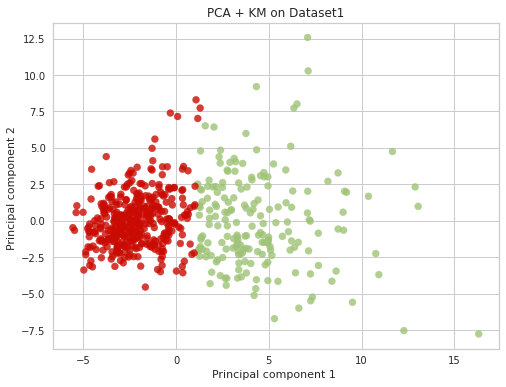

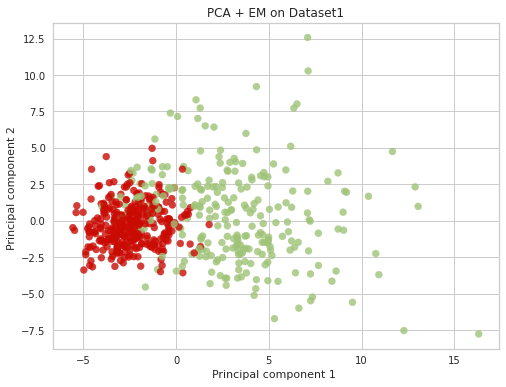

In [178]:
# pca
temp = PCA(n_components = 7).fit_transform(features)

km_dic = {"n_clusters":2,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.title("PCA + KM on Dataset1")
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
EM_dic = {"n_components":2,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
plt.title("PCA + EM on Dataset1");

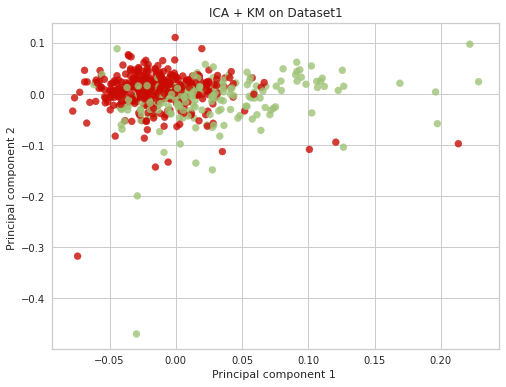

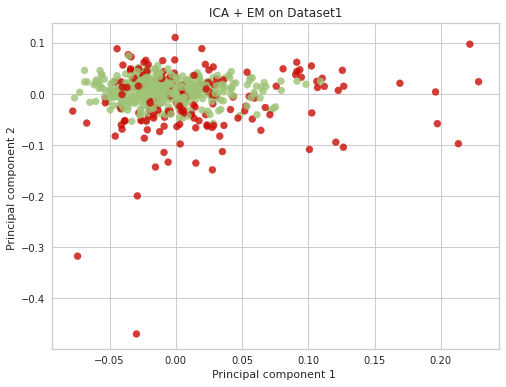

In [177]:
#ica 
temp = FastICA(n_components = 9).fit_transform(features)

km_dic = {"n_clusters":2,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.title("ICA + KM on Dataset1")
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
EM_dic = {"n_components":2,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
plt.title("ICA + EM on Dataset1");

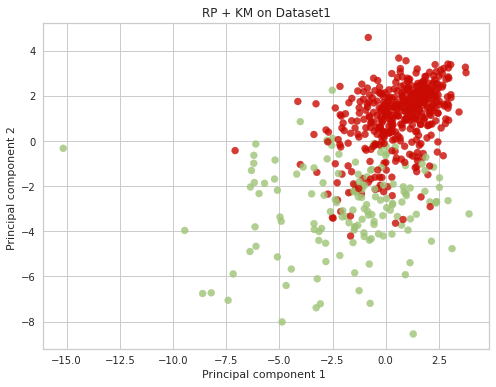

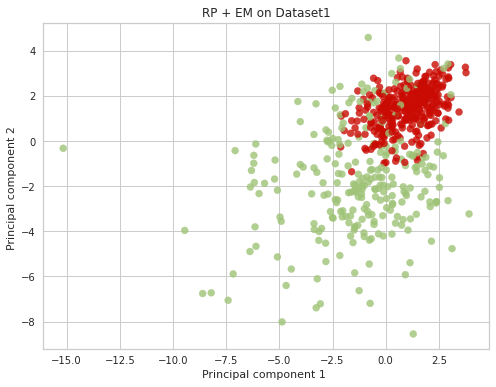

In [176]:
#rp 
temp = GaussianRandomProjection(n_components = 7).fit_transform(features)

km_dic = {"n_clusters":2,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.title("RP + KM on Dataset1")
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
EM_dic = {"n_components":2,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
plt.title("RP + EM on Dataset1");

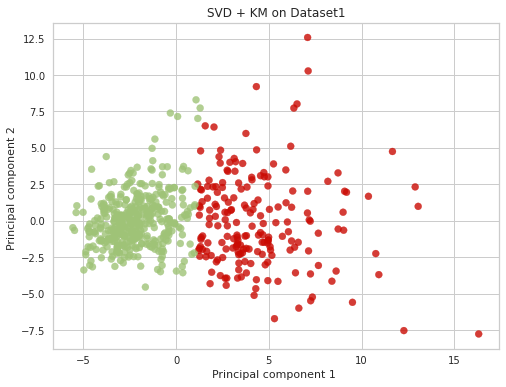

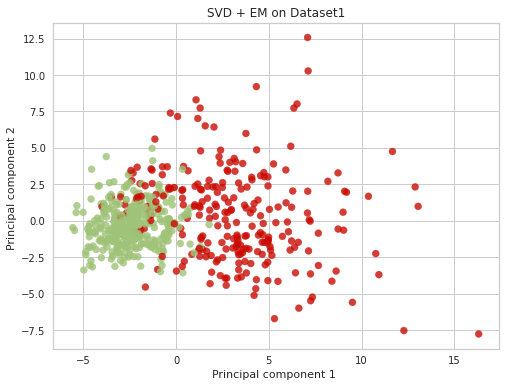

In [179]:
#svd
temp = TruncatedSVD(n_components = 7).fit_transform(features)

km_dic = {"n_clusters":2,"init":"k-means++","n_init":1,"max_iter":100}
res = KMeans(**km_dic).fit_predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.title("SVD + KM on Dataset1")
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
EM_dic = {"n_components":2,"init_params":"kmeans","n_init":1,"max_iter":100}
res = BayesianGaussianMixture(**EM_dic).fit(temp).predict(temp)

plt.figure(figsize = (8,6))
plt.scatter(temp[:, 0], temp[:, 1], c=['r' if res[i] == 0 else 'g' for i in range(len(res))],alpha = 0.8);
plt.xlabel("Principal component 1 ")
plt.ylabel("Principal component 2 ")
plt.title("SVD + EM on Dataset1");

## 3.2 KMeans and EM Clustering on feature-reduced dataset1

In [180]:
##################TODO

# KM,dataset1
from tabulate import tabulate


km_dic = {"n_clusters":0,"init":"k-means++","n_init":1,"max_iter":100}
EM_dic = {"n_components":0,"init_params":"kmeans","n_init":1,"max_iter":100}
km_dic["n_clusters"] = 2
EM_dic["n_components"] = 2
km = KMeans(**km_dic)
em = BayesianGaussianMixture(**EM_dic)

# optimal n_components
models = [GaussianRandomProjection(7),PCA(7),TruncatedSVD(7),FastICA(9)]
names = ["RP(7)","PCA(7)","SVD(7)","ICA(9)"]

reclustering_km_res1 = []

    
for i,model in enumerate(models):
    temp = model.fit_transform(features)
    
    start_time = time.time()
    preds = km.fit_predict(temp)
    end_time = time.time()
    
    homogeneity,_,_ = homogeneity_completeness_v_measure(labels,preds)
    row = [names[i],-km.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
           float("%0.2f"%(end_time - start_time))]
    reclustering_km_res1.append(row)
    
# original performance as reference
start_time = time.time()
preds = km.fit_predict(features)
end_time = time.time()
homogeneity,_,_ = homogeneity_completeness_v_measure(labels,preds)
row = ["Ori(30)",-km.score(features),np.sum(features),
       float("%0.4f"%np.std(features)),
       float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
       float("%0.6f"%(end_time - start_time))]
reclustering_km_res1.append(row)

    
print (tabulate(reclustering_km_res1,headers=['', 'sum(dist)',"sum","std","MutualInfo","homogeneity","time"])    )

           sum(dist)           sum     std    MutualInfo    homogeneity      time
-------  -----------  ------------  ------  ------------  -------------  --------
RP(7)    12677.3      -3.12639e-13  2.4852          0.58           0.57  0
PCA(7)   10062.9      -8.52651e-14  1.9749          0.56           0.55  0.01
SVD(7)   10062.9       3.69482e-13  1.9749          0.56           0.55  0.01
ICA(9)       8.24686  -1.33227e-15  0.0419          0.7            0.68  0.01
Ori(30)  11595.5       2.13163e-14  1               0.53           0.52  0.005558


In [161]:
# EM,dataset1
reclustering_em_res1 = []
  
for i,model in enumerate(models):
    temp = model.fit_transform(features)
    
    start_time = time.time()
    preds = em.fit(temp).predict(temp)
    end_time = time.time()
    
    homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels,preds)
    row = [names[i],em.score(temp),np.sum(temp),
           float("%0.4f"%np.std(temp)),
           float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
           float("%0.2f"%(end_time - start_time))]
    reclustering_em_res1.append(row)
    
# original performance as reference
start_time = time.time()
preds = em.fit(features).predict(features)
end_time = time.time()
homogeneity,_,v_measure = homogeneity_completeness_v_measure(labels,preds)
row = ["Ori(30)",em.score(features),np.sum(features),
       float("%0.4f"%np.std(features)),
       float("%0.2f"%adjusted_mutual_info_score(labels,preds)),
            float("%0.2f"%homogeneity),
       float("%0.6f"%(end_time - start_time))]

reclustering_em_res1.append(row)

In [162]:
# rp,pca,svd use the least time (~10 sec)
print (tabulate(reclustering_em_res1,headers = ["", 'mean(logP)',"sum","std","MutualInfo","homogeneity","time"])    )

           mean(logP)           sum     std    MutualInfo    homogeneity      time
-------  ------------  ------------  ------  ------------  -------------  --------
RP(7)      -11.0819    -1.03739e-12  1.9347          0.15           0.13  0.07
PCA(7)     -12.1977    -1.98952e-13  1.9749          0.35           0.36  0.07
SVD(7)     -12.1977     3.12639e-13  1.9749          0.35           0.36  0.07
ICA(9)      16.6024     3.66374e-15  0.0419          0.63           0.63  0.06
Ori(30)     -0.770842   2.13163e-14  1               0.63           0.63  0.058987


# 4. Neuron Network on Reprojected Dataset2

In [ ]:
# ori + 4 reprojected data = 5
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

learner = MLPClassifier(hidden_layer_sizes = (50,))

n = X_train2.shape[0]
train_sizes = [int(0.1*i*n)+1 for i in range(10)] + [n]

models = [TruncatedSVD(59),GaussianRandomProjection(60),PCA(60),FastICA(63)]
names = ["SVD(59)","RP(60)","PCA(60)","FastICA(63)","Ori(79)"]

datasets2 = []
for model in models:
    temp = model.fit_transform(X_train2)
    datasets2.append(temp)
datasets2.append(X_train2)

In [ ]:
learningcurve_results = {}
time_res = {}

for name,dataset in zip(names,datasets2):
    learningcurve_results[name] = {"train":[],"test":[]}
    time_res[name] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        learningcurve_results[name]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        learningcurve_results[name]['test'].append(accuracy_score(y_test,ytest_pred)) 
        time_res[name].append(end_time - start_time)

In [ ]:
plt.figure(figsize = (12,8))
colors = ['red','blue','green','orange','black']

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2 ',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['test'],c = color, label = name + ',test',linewidth = 4)
    plt.plot(x_data,learningcurve_results[name]['train'],c = color, linestyle='dashed',label = name + ',train',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 12);   

In [ ]:
plt.figure(figsize = (8,6))

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP training time on dataset2 ',fontsize = 26)
    plt.plot(x_data,time_res[name],c = color, label = name ,linewidth = 4)
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Training time")
    plt.legend(loc="best",fontsize = 12);   

# 5. Neuron Network on Reprojected features and Clustering features


In [ ]:
# ori

models = [TruncatedSVD(59),GaussianRandomProjection(60),PCA(60),FastICA(63)]
names = ["Ori(79)",
         "4 KM clustering labels",
         "4 EM clustering labels",
         "79+4KM","79+4EM","79+4KM+4EM"]

datasets2 = []

KM_clustering_labels = []
EM_clustering_labels = []

for model in models:
    temp = model.fit_transform(X_train2)
    KM_clustering_labels.append(km.fit_predict(X_train2))

for model in models:
    temp = model.fit_transform(X_train2)
    EM_clustering_labels.append(em.fit(X_train2).predict(X_train2))

KM_clustering_labels = np.array(KM_clustering_labels).T
EM_clustering_labels = np.array(EM_clustering_labels).T   

datasets2 = [X_train2,KM_clustering_labels,EM_clustering_labels, 
             np.concatenate([X_train2,KM_clustering_labels],axis=1),
             np.concatenate([X_train2,EM_clustering_labels],axis=1),
             np.concatenate([X_train2,KM_clustering_labels,EM_clustering_labels],axis=1)]

In [ ]:
learningcurve_results = {}
time_res = {}

for name,dataset in zip(names,datasets2):
    learningcurve_results[name] = {"train":[],"test":[]}
    time_res[name] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        learningcurve_results[name]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        learningcurve_results[name]['test'].append(accuracy_score(y_test,ytest_pred)) 
        time_res[name].append(end_time - start_time)

In [ ]:
colors = ['black','red','blue','green','orange','purple']

plt.figure(figsize = (12,8))
for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['train'],c = color, linestyle = 'dashed',label = name + ',train',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   

for name,color in zip(names,colors):
    x_data = [i*10 for i in range(11)]    
    plt.title('MLP Learning Curve on dataset2',fontsize = 26)
    plt.plot(x_data,learningcurve_results[name]['test'],c = color, label = name + ',test',linewidth = 4)

    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   

In [ ]:
KM_clustering_labels= []
for model in models:
    temp = model.fit_transform(X_train2)
    KM_clustering_labels.append(km.fit_predict(X_train2))

temp_results = {}
temp_res = {}

for i,dataset in  enumerate(KM_clustering_labels):
    temp_results[i] = {"train":[],"test":[]}
    temp_res[i] = []
    for size in train_sizes:
        start_time = time.time()
        learner.fit(X_train[:size],y_train[:size])
        end_time = time.time()
        ytrain_pred = learner.predict(X_train[:size])        
        ytest_pred = learner.predict(X_test)
        
        temp_results[i]['train'].append(accuracy_score(y_train[:size],ytrain_pred))
        temp_results[i]['test'].append(accuracy_score(y_test,ytest_pred)) 
        temp_res[i].append(end_time - start_time)

In [ ]:
plt.figure(figsize = (8,6))
for i in range(4):
    x_data = [j*10 for j in range(11)]    
    plt.title('MLP Learning Curve on 4 KM Clustering Features',fontsize = 26)
    plt.plot(x_data,temp_results[i]['test'],c = colors[i], label = str(i) + ',train',linewidth = 4)
    plt.plot(x_data,temp_results[i]['train'],c = colors[i], linestyle = 'dashed',label = str(i) + ',train',linewidth = 4)
    
    plt.xlabel("Percentage of training data used")
    plt.ylabel("Accuracy")
    plt.legend(loc="best",fontsize = 10);   